In [1]:
import numpy as np
import pandas as pd


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
   
df = pd.read_csv(url)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


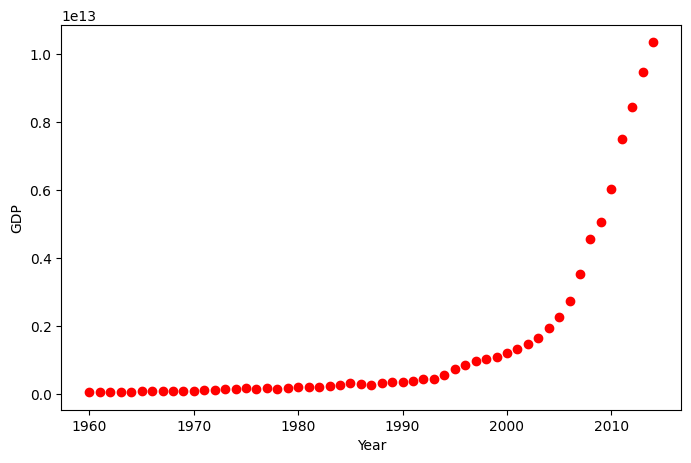

In [3]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [4]:
x = np.asanyarray(df[['Year']] /df['Year'].max())
y = np.asanyarray(df[['Value']] /df['Value'].max())

In [5]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [6]:
lr_model.fit(x,y)

LinearRegression()

In [7]:
y_predicted = lr_model.predict(x)


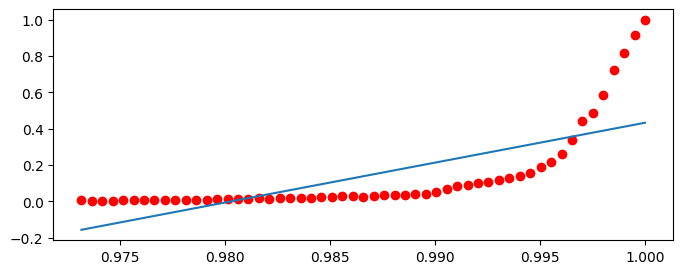

In [8]:
plt.figure(figsize=(8,3))
plt.plot(x,y,'ro',label='data')
plt.plot(x,y_predicted,label='fit')
plt.show()

In [9]:
from sklearn.metrics import mean_absolute_error
print(f"MAE:{mean_absolute_error(y_predicted , y)}")

MAE:0.12657979406214762


In [10]:
#Polynomial_Regression


In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 3 ,include_bias = False)


In [12]:
x_poly = poly_features.fit_transform(x)

In [13]:
lr_model.fit(x_poly,y)

LinearRegression()

In [14]:
y_predic = lr_model.predict(x_poly)

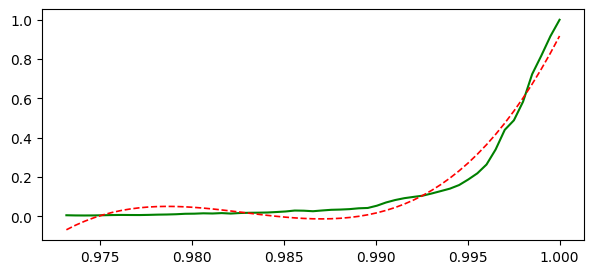

In [15]:
plt.figure(figsize=(7,3))
plt.plot(x,y,color='g',label='data')
plt.plot(x,y_predic,linestyle='--',linewidth=1.2,color='r')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
train_set ,test_set = train_test_split(df,test_size=0.2,random_state=42)

x_train = np.asanyarray(train_set[['Value']]/df['Value'].max())
y_train = np.asanyarray(train_set[['Year']]/df['Year'].max())

In [17]:
#Pipeline

In [18]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('polynomial_regression',PolynomialFeatures(degree=5,include_bias=False)),
    ('lr_model',LinearRegression())
])
    

In [19]:
polynomial_regression.fit(x_train,y_train)

Pipeline(steps=[('polynomial_regression',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('lr_model', LinearRegression())])

In [20]:
x_test = np.asanyarray(test_set[['Value']]/test_set['Value'].max())
y_test = np.asanyarray(test_set[['Year']]/test_set['Year'].max())

In [21]:
y_pred = polynomial_regression.predict(x_test)


In [22]:
print('mae',mean_absolute_error(y_pred , y_test))

mae 0.0013477591635982953


In [23]:
#Curve_fit

In [57]:
y_data , x_data = (df['Value'].values , df['Year'].values)
ydata  = y_data/max(y_data)
xdata = x_data/max(x_data) 

In [58]:
def sigmoid(x , beta_1 , beta_2):
    y = 1 / (1 + np.exp(-beta_1*(x-beta_2)))
    return y

In [59]:
from scipy.optimize import curve_fit

beta , pcov = curve_fit(sigmoid , xdata ,ydata)
print(f"Beta1 : {beta[0]}\nBeta2 : {beta[1]}")

Beta1 : 690.4517118227653
Beta2 : 0.9972071272524615


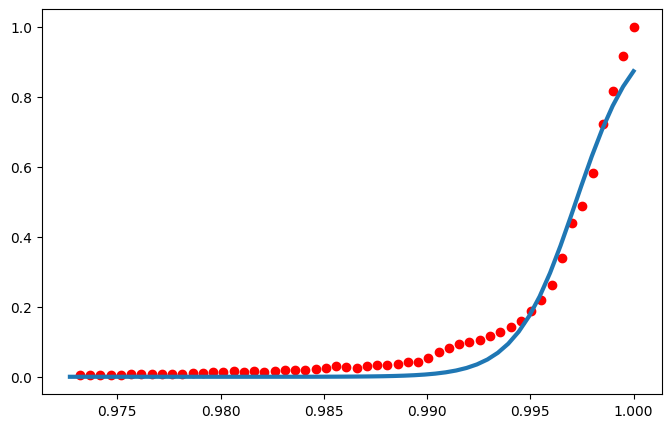

In [60]:
x = np.linspace(1960,2015,55)
x = x/max(x)
plt.figure(figsize=(8,5))
yhat  = sigmoid(x,*beta)
plt.plot(xdata , ydata , 'ro' , label='data')
plt.plot(x , yhat, linewidth=3.0 , label='fit')
plt.show()

In [61]:
from sklearn.metrics import mean_absolute_error

In [62]:
mae = mean_absolute_error(yhat,ydata)
mae

0.03049841883900717